# Puntos de equilibrio y métodos númericos 

Gran parte de la introducción a este método para encontrar raíces de una ecuación, ya fue explorado en clase. Sin embargo, vamos a hacerlo solamente por completez y para las personas que no asistieron a la sesión. 

## El contexto del problema. 

Durante la clase, mientas se presentaban las bifurcaciones tipo _pitchfork supercríticas_, se abordo el siguiente sistema:
$$
\frac{dx}{dt} = f(x;\beta) = -x + \beta \tanh{(x)}
$$
Solamente como contexto, la utilidad de una ecuación tan peculiar deriva del aprendizaje máquina (machine learning), en particular en redes neuronales, donde esta función es usada en redes neuronales recurrentes ([RRN](https://en.wikipedia.org/wiki/Recurrent_neural_network)). En este tipo de arquitectura de redes neuronales es común que, cuando hay muchas capas escondidas/profundas (_hidden layers_) el gradiente se pueda anular lo cual afecta directamente el entrenamiento de la red neuronal ya que el algoritmo más usado es backpropagation (_propagación-hacia-atrás_) y depende del gradiente de las funciones de error y las de activación. Es ahí donde esta función de activación se usa como un amplificador.

Después de realizar análisis geométrico se puede derivar la existencia de una bifurcación tipo pitchfork supercrítica, con $\beta_{c} = 1$. Esto es fácilmente comprobable si analizamos la intersección de $y=x$ con $y = \beta \tanh{(x)}$.

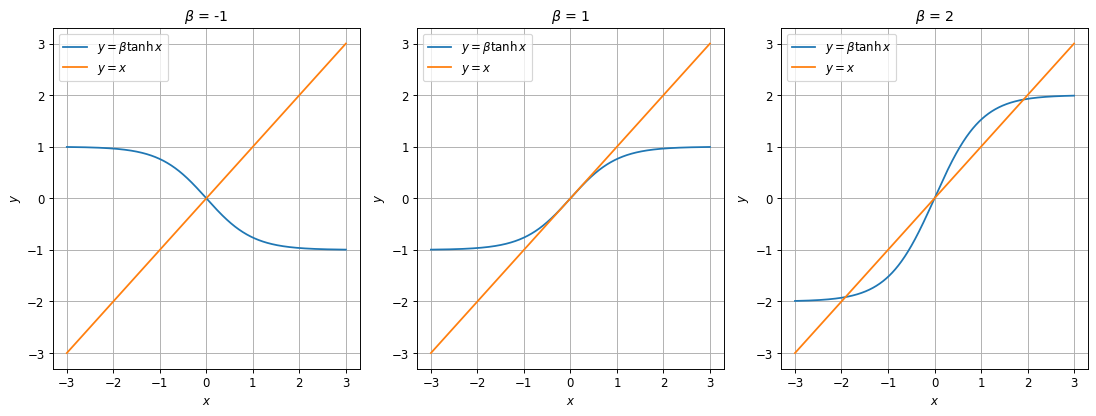

In [41]:
import matplotlib.pyplot as plt # Aquí están las funciones para graficar
from matplotlib.lines import Line2D
import numpy as np # Aquí obtenemos las funciones matemáticas y de álgebra lineal

g = lambda x,beta:beta*np.tanh(x) # definimos la función pendiente
x = np.linspace(-3,3,1000) # creamos mil puntos equidistantes en el intervalo [-4,4]
betas = [-1,1,2] # creamos una lista de valores para beta

fig, ax = plt.subplots(1,3,figsize = (13,5),dpi=85)

for idx,b in enumerate(betas): # enumerate nos devuelte un iterable de la forma [(0,elemento_0),(1,elemento_1),...,(n-1,elemento_n-1)]
    y = g(x,b) # calculamos beta*tanh(x) para la beta del ciclo y todos los valores de x
    ax[idx].plot(x,y,label = r"$y = \beta \tanh x$") # graficamos beta*tanh(x)
    ax[idx].plot(x,x,label = "$y = x$") # graficamos y=x
    ax[idx].set_title(r'$\beta$ = '+str(b)) # Le ponemos el título a la gráfica
    ax[idx].set_xlabel(r'$x$') # Le ponemos nombre al eje x
    ax[idx].set_ylabel(r'$y$') # Le ponemos nombre al eje y
    ax[idx].legend() # Mostramos los nombres de cada plot (el atributo "label")
    ax[idx].grid(True) # Mostramos la rejilla

fig.tight_layout() # ajustamos el gráfico al espacio para que se vea bien
plt.show() # Nos aseguramos de mostrar e imprimir el objeto en la pantalla

En la serie de gráficas presentadas es posible ver que:
1. En $\beta = -1$ hay un punto de equilibrio $x^{\star} = 0$ que es estable, 
2. En $\beta = 1$ hay un punto de equilibrio $x^{\star} = 0$ que es estable pero donde las soluciones se acercan más lento,
3. En $\beta = 2$ hay tres puntos de equilibrio, $x^{\star} = 0$ es ahora inestable.

El gran punto de todo esto es que si bien podemos caracterizar el tipo de bifurcación y dónde sucede, realemente dibujamos el diagrama de bifurcación extrapolando nuestro conocimiento sobre la intersección de $x$ y $\beta \tanh{(x)}$ pero realmente sabemos los valores de $x^{\star}$. Para saber realmente el valor de los puntos de equilibrio deberíamos resolver la siguiente ecuación,
$$
f(x,\beta) = \beta \tanh{(x^{\star})} - x^{\star} = 0
$$
El gran problema es que tenemos una función implícita de $x^{\star}$, es decir, no hay forma que en término de funciones fundamentales encontremos una forma explícita para $x^{\star}(\beta)$

¿Qué se hace en estos casos? Se acude a los métodos númericos -o a las funciones especiales, pero yo, Ulises, casi siempre prefiero usar la compu-.

## El método de Newton-Raphson

Ahora si, vamos a repasar lo que se presento en clase sobre este método númerico. 

Este método ayuda a encontrar las raíces reales -solamente las reales- de una función real valuada $f(x)$. Las condiciones para poder usar le método son las siguientes:
1. f(x) = 0, 
2. Debe de ser posible calcular analiticamente $f'(x)$ y además evaluarla en valores de $x$.

La idea del método es muy senciilla y se puede resumir en el siguiente algoritmo:
1. **Adivinanza inicial:** Vamos a comenzar asumiento que un punto $x_0$ del dominio de $f(x)$ es su raíz, 

2. **Proceso de iteración:** Aquí vamos a refinar la adivinanza usando la siguiente relación
    $$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$
    Donde $f(x_0)$ y $f'(x_0)$ denotan evaluar $f$ y $f'$ en $x_0$, la adivinanza inicial. Notemos que si $f(x_0)>0$ y $f'(x_0)>0$ entonces $x_1 < x_0$, otrora $x_1 > x_0$. Y si diera, por suerte, que $x_0$ sí era raíz de $f(x)$, entonces $x_1 = x_0$
    
3. **Convergencia:** Regularmente no pasa que $x_0$ sea una raíz. Más aún, al ser un método númerico, es normal que podamos acarrear cierto error derivado de la precisión y la máxima cantidad de decimales que nuestra computadora y lenguaje de programación puedan manejar. Es por lo anterior que _a priori_ definimos un parámetro $\eta$, al que llamaremos **tolerancia**. 

    Entonces, vamos a continuar iterando el sistema siguiendo la ecuación:  
    $$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$
    Y vamos a parar de iterar la ecuación cuando $\|x_{n+1} - x_n\|< \eta$. 

    En palabras: Vamos a dejar de refinar la adivinanza inicial cuando estemos lo suficientemente cerca de la raíz. En este senetido, es importante notar que, usualmente, $\eta$ es un parámetro muy pequeño. Entre más pequeño, más tardarás en encontrar el valor de la raíz. Toma en cuenta que si $\eta$ es más pequeña que la precisión de tu computadora/lenguaje, entonces el algoritmo nunca va a parar. 

Vamos a ver cómo luce este método aplicado a nuestro problema:
1. Para cada iteración del método vamos a tener que fijar un valor para $\beta$,

2. $f(x,\beta) = \beta \tanh{(x)} - x$ y $f'(x) = \beta sech^{2}(x) -1$

3. La función para iterar es:
    $$
    x_{n+1} = x_{n} - \frac{\beta\tanh{(x_n)} - x_n}{\beta sech^{2}(x_n) -1}
    $$

En este problema sabemos que, cuando $\beta > 1$, hay dos raíces además de $x^{*} = 0$. Este método encuentra una raíz a la vez, no todas. En este caso, como hay una simetría respecto al eje $x$, sabemos que encontrar una -ya sea la positiva o negativa- nos da la otra al multiplicar con $-1$. Pero esto no siempre pasa, regularmente hay que buscar todas las raíces y explorar el dominio de $f$. 

En pseudo-código nuestro algortimo es:

```
Algoritmo NewtonRaphson_Tanh
Input:
    b            // Número real
    x0           // Adivinanza inicial para la raíz
    tol          // Tolerancia para la convergencia (e.g., 1e-6)
    max_iter     // Número máximo de iteraciones (e.g., 100)

Output:
    x            // Solución aproximada a x = b * tanh(x)
    iter         // Número de iteraciones realizadas
    converged    // Variable booleana que indica si hubo convergencia o no
Begin
    Set x = x0
    Set iter = 0
    Set converged = False

    While iter < max_iter do
        Compute f = x - b * tanh(x)
        Compute df = 1 - b * (sech(x))^2

        If df == 0 then
            Print "La derivada se anuló, no se encontró raíz."
            Exit

        Compute x_new = x - f / df

        If |x_new - x| < tol then
            Set converged = True
            Set x = x_new
            Break

        Set x = x_new
        Increment iter by 1
    End While

    If not converged then
        Print "No hubo convergencia en el número máximo de iteraciones."
    End If

    Return (x, iter, converged)
End
```

## Aplicando el método en Python

Queremos extraer las raíces para muchos valores de $\beta$, por eso necesitamos poder abstraer el algortimo en una función de python, pero voy a realizar uno sin abstracción para que veamos cómo funciona.

In [17]:
f = lambda x,beta: beta*np.tanh(x) - x
df = lambda x,beta: beta*(1/np.cosh(x))**2 - 1 # sech(x) = 1/cosh(x)

tol = 1e-6 # Esto es una tolerancia de 1x10^-6
max_iter = 200 # número máximo de iteraciones
i = 0 # valor en al primer iteración
x0 = 20 # adivinanza inicial
beta = 2 # Valor de beta
converged = False # Inicializamos la variable de convergencia como falsa

x = x0
while i < max_iter:
    _f = f(x,beta)
    _df = df(x,beta) 
    if _df == 0:
        print("La derivada se anuló en x = {:.2f}, no hubo convergencia".format(x))
        break 

    x_new = x - _f/_df

    if np.abs(x_new - x) < tol:
        converged = True
        x = x_new
        break

    x = x_new
    i += 1

if not converged:
    print("No se encontro convergencia en el número máximo de iteraciones")
else: 
    print("Se encontro convergencia en {}-iteraciones, la raíz es x={:.2f}".format(i,x))

Se encontro convergencia en 3-iteraciones, la raíz es x=1.92


El agoritmo encontró convergencia en solamente tres iteraciones y, además, el valor de la raíz es $1.92$. Sabemos que $x^{\star} = 0$ siempre es una raíz, además de que, por simetría, $-1.92$ también será raíz. 

Vamos entonces a abstraer nuestro algortimo en una función que reciba como parámetros: un valor de $\beta$, un valor para $x_0$, el valor de $\eta$ y el número máximo de iteraciones.

In [28]:
f = lambda x,beta: beta*np.tanh(x) - x
df = lambda x,beta: beta*(1/np.cosh(x))**2 - 1 # sech(x) = 1/cosh(x)

def newton_raphson(x0,beta,tol=1e-20,max_iter=200):
    
    i = 0
    converged = False # Inicializamos la variable de convergencia como falsa
    x = x0

    while i < max_iter:
        _f = f(x,beta)
        _df = df(x,beta) 
        if _df == 0:
            break 

        x_new = x - _f/_df

        if np.abs(x_new - x) < tol:
            converged = True
            x = x_new
            break

        x = x_new
        i += 1
    return x, i, converged

Ahora, vamos a iterar para un rango de valores de $\beta$.

In [29]:
betas = np.linspace(-5,5,100) 
x0 = 20 # Vamosa dejar x0 como 20 siempre
roots = [] # Aquí vamos a guardar las raíces
converged_beta = [] # Aquí vamos a guardar las betas para las raíces que sí convergieron

for b in betas:
    X = newton_raphson(x0=x0,beta=b)
    if X[-1]:
        roots.append(X[0])
        converged_beta.append(b)

Ya que encontramos las raíces vamos a hacer ahora sí el diagrama de bifuraciones.

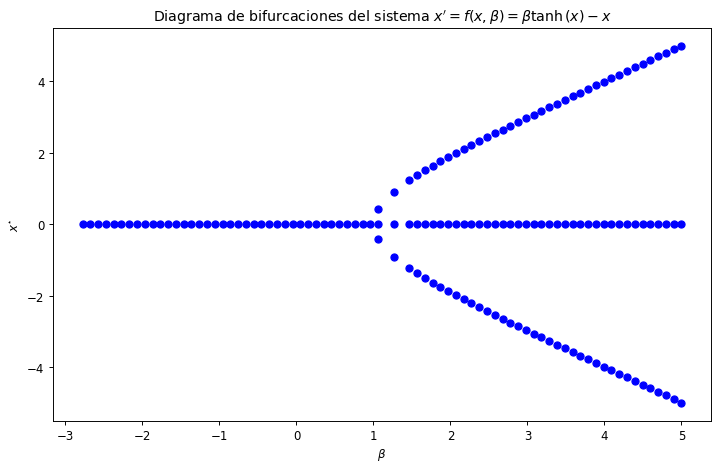

In [35]:
fig,ax = plt.subplots(1,1,figsize=(10,6),dpi=85)

for r,b in zip(roots,converged_beta):
    if np.abs(r) < 1e-20:
        r = 0
        ax.scatter(b,r,c='b')
        continue
    else:
        ax.scatter(b,-r,c='b')
        ax.scatter(b,0,c='b')
        ax.scatter(b,r,c='b')

ax.set_title(r"Diagrama de bifurcaciones del sistema $x' = f(x,\beta) = \beta \tanh{(x)} - x$")
ax.set_ylabel(r"$x^{\star}$")
ax.set_xlabel(r"$\beta$")

plt.show()

Cool, right?

Pero todavía podemos hacer algo aún más interesante, podemos usar el teorema de linearización para poder mostrar la estabilidad de los puntos de equilibrio. 

El teorema de linearización nos dice que, en sistemas 1D, si $x^{\star}$ es un pto de equilibrio del sistema $x' = f(x)$ entonces:
* Si $f'(x^{\star}) > 0 $ entonces $x^{\star}$ es inestable,
* Si $f'(x^{\star}) < 0 $ entonces $x^{\star}$ es estable,
* Si $f'(x^{\star}) = 0 $ entonces se requiere más información. 

Este teorema lo podemos abstraer en una función que evalúe si el punto es estable, inestable o si requiere más información. 

In [38]:
def stability(x,beta):
    s = 0 # si la derivada es 0 entonces s = 0
    _dfx = df(x,beta)
    if _dfx > 0:
        s = 1 # Con s = 1 decimos que es inestable
    elif _dfx < 0:
        s = -1 # Con s = 1 decimos que es estable
    return s

def color_stability(s_code):
    if s_code > 0:
        color = 'r'
    elif s_code < 0:
        color = 'b'
    else:
        color = 'y'
    return color

Y ahora sí, con las funciones anteriores vamos a pintar la estabilidad en el diagrama de bifurcaciones.

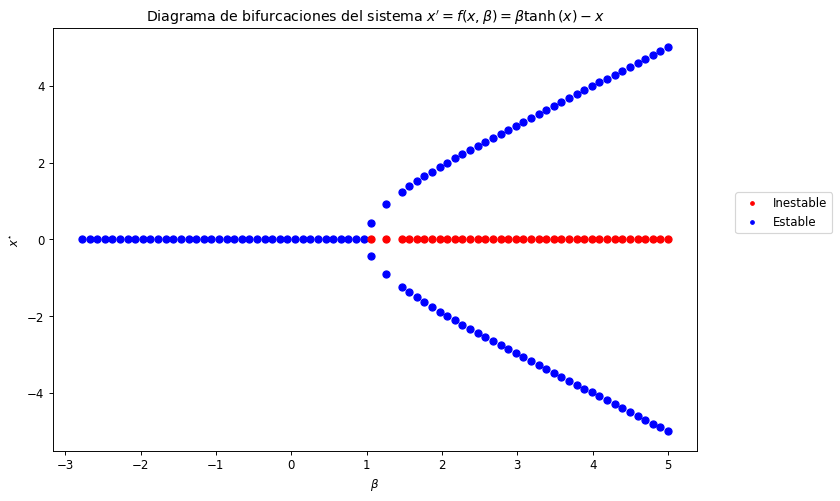

In [44]:
fig,ax = plt.subplots(1,1,figsize=(10,6),dpi=85)

for r,b in zip(roots,converged_beta):
    if np.abs(r) < 1e-20:
        r = 0
        color = color_stability(stability(r,b))
        ax.scatter(b,r,c=color)
        continue
    else:
        color = color_stability(stability(-r,b))
        ax.scatter(b,-r,c=color)
        color = color_stability(stability(0,b))
        ax.scatter(b,0,c=color)
        color = color_stability(stability(r,b))
        ax.scatter(b,r,c=color)

ax.set_title(r"Diagrama de bifurcaciones del sistema $x' = f(x,\beta) = \beta \tanh{(x)} - x$")
ax.set_ylabel(r"$x^{\star}$")
ax.set_xlabel(r"$\beta$")

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None')]

ax.legend(handles = custom, labels=['Inestable', 'Estable'], bbox_to_anchor= (1.05, 0.5), loc= "lower left")

fig.tight_layout()
plt.show()

# Un problema para ti

Considera el siguiente sistema:
$$
x' = r x + x^3 − x^5
$$

Encuentra los puntos de equilibrio del sistema y grafíca el diagrama de bifurcación. Asegurate que en diagrama de bifurcación se muestre la estabilidad de los puntos.